# Hierarchical Clustering – Grouping Project

## Project Overview
In this project, Hierarchical Clustering is applied to group similar customers based on their income and spending behavior.  
The objective is to discover natural groupings in the data without predefining the number of clusters and to interpret these groups for business insights.

**Algorithm Used:** Agglomerative Hierarchical Clustering  
**Linkage Method:** Ward  
**Evaluation:** Dendrogram analysis & Silhouette Score


## Problem Statement
The goal of this project is to segment customers into meaningful groups using Hierarchical Clustering.  
Understanding customer groups helps businesses design targeted marketing strategies, improve customer engagement, and optimize resource allocation.


In [170]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score


## Dataset Loading
The dataset contains customer information such as annual income and spending score.
Only numerical features relevant for clustering are selected.


In [171]:
# load dataset
df = pd.read_csv('/content/extracted_data/Mall_Customers.csv')

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

display(df.head())


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis (EDA)
Before clustering, it is important to understand the distribution and relationship between features.


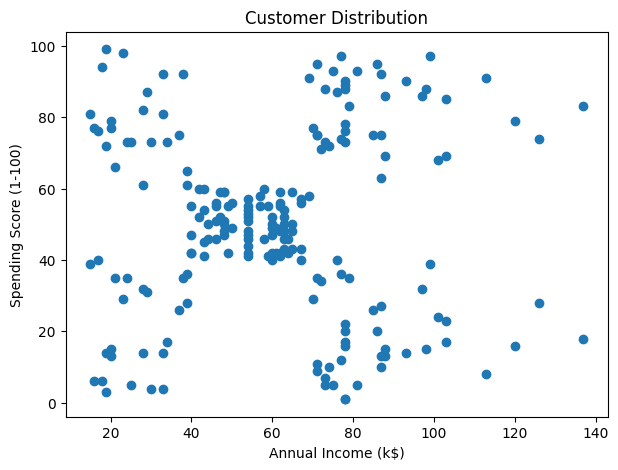

In [172]:
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Distribution")
plt.show()

## Data Scaling
Hierarchical clustering is distance-based, so feature scaling is required to ensure equal contribution from all features.


In [173]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Building the Hierarchical Clustering Model
Ward linkage is used as it minimizes variance within clusters and produces compact, interpretable groups.


In [174]:
Z = linkage(X_scaled, method='ward')


## Dendrogram Visualization
The dendrogram helps determine the optimal number of clusters by identifying large vertical distance gaps.


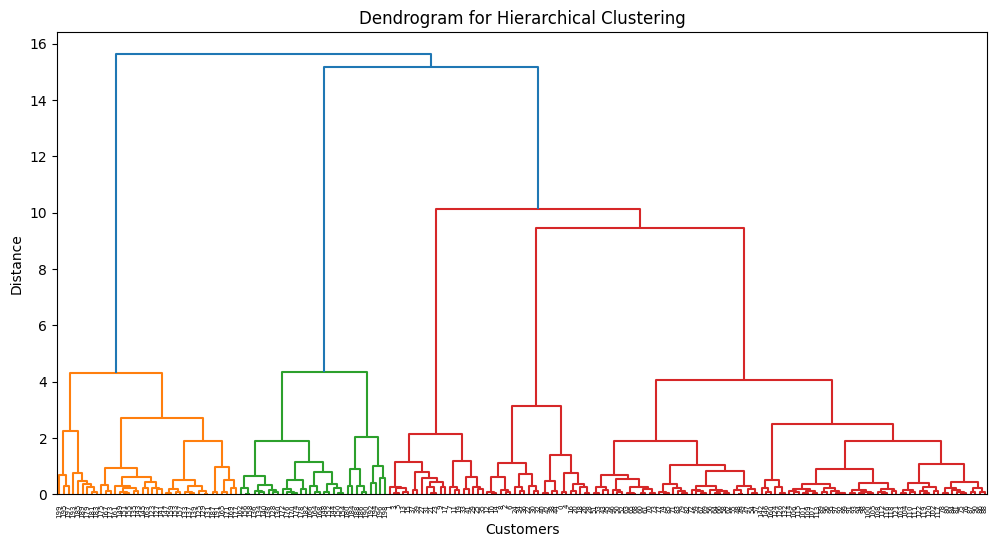

In [175]:
plt.figure(figsize=(12,6))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()


## Cluster Formation
Based on dendrogram analysis, the data is divided into **3 clusters**.


In [176]:
df['Cluster'] = fcluster(Z, t=3, criterion='maxclust')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3


## Cluster Visualization
Clusters are visualized in the original feature space for better interpretability.


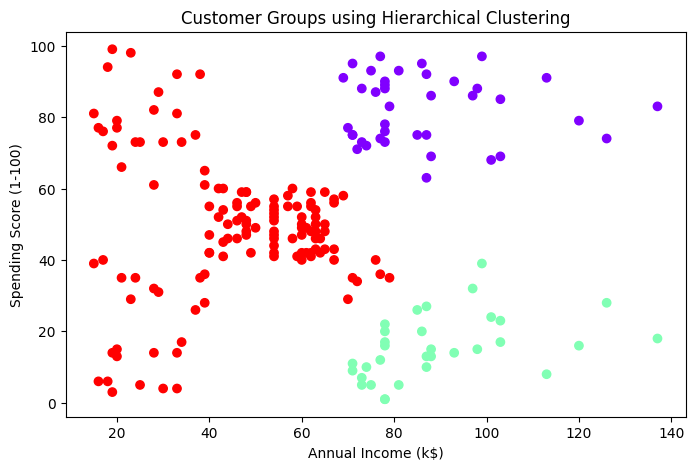

In [177]:
plt.figure(figsize=(8,5))
plt.scatter(df['Annual Income (k$)'],
            df['Spending Score (1-100)'],
            c=df['Cluster'],
            cmap='rainbow')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Groups using Hierarchical Clustering")
plt.show()


## Cluster Analysis
Analyzing the characteristics of each cluster to understand customer behavior.


In [178]:
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()

,Annual Income (k$),Spending Score (1-100),Age
Cluster,,,
1,86.538462,82.128205,32.692308
2,89.406250,15.593750,41.000000
3,45.550388,49.131783,40.178295


## Evaluation – Silhouette Score
The silhouette score measures how well data points fit within their assigned cluster.


In [179]:
score = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.4610481446570447


## Results & Interpretation

- Cluster 1: High income, high spending → Premium customers  
- Cluster 2: Low income, low spending → Budget-conscious customers  
- Cluster 3: Medium income, moderate spending → Regular customers  

These segments can be used for targeted marketing and personalized customer strategies.


## Conclusion
Hierarchical clustering successfully grouped customers into meaningful segments without predefining the number of clusters.  
The dendrogram provided valuable insight into the structure of the data, and the resulting clusters were interpretable and actionable.

This project demonstrates the effective use of unsupervised learning for customer segmentation.
